### Stock Price Forecaster

Learning how to use facebooks phrophet library by predicting stock prices  
Change STOCK_SYMBOL and START_DATE

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pandas_datareader.data as web

In [65]:
STOCK_SYMBOL = 'CPI'
START_DATE = '01/01/2010'

In [66]:
df = web.get_data_yahoo(STOCK_SYMBOL,START_DATE,interval='d')

In [67]:
df['y'] = np.log(df['Close'])
df['ds'] = pd.to_datetime(df.index)
df.tail()

,Open,High,Low,Close,Volume,Adj Close,y,ds
Date,,,,,,,,
2017-03-08,27.080000,27.080000,27.070000,27.070000,1700,27.070000,3.298426,2017-03-08
2017-03-09,27.030001,27.049999,27.030001,27.049999,1000,27.049999,3.297687,2017-03-09
2017-03-10,27.000000,27.040001,27.000000,27.020000,700,27.020000,3.296577,2017-03-10
2017-03-13,27.040001,27.040001,27.030001,27.040001,600,27.040001,3.297317,2017-03-13
2017-03-14,27.040001,27.070000,27.010000,27.010000,6100,27.010000,3.296207,2017-03-14


In [68]:
# Generate data model
model = Prophet()
model.fit(df);

In [69]:
# Extend date range
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2171,2018-03-10
2172,2018-03-11
2173,2018-03-12
2174,2018-03-13
2175,2018-03-14


In [70]:
# Add in predictions to the new dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2171,2018-03-10,3.312695,3.250074,3.375695
2172,2018-03-11,3.312751,3.250447,3.375122
2173,2018-03-12,3.316359,3.253031,3.379812
2174,2018-03-13,3.316641,3.252248,3.381479
2175,2018-03-14,3.316804,3.254392,3.381100


CPI


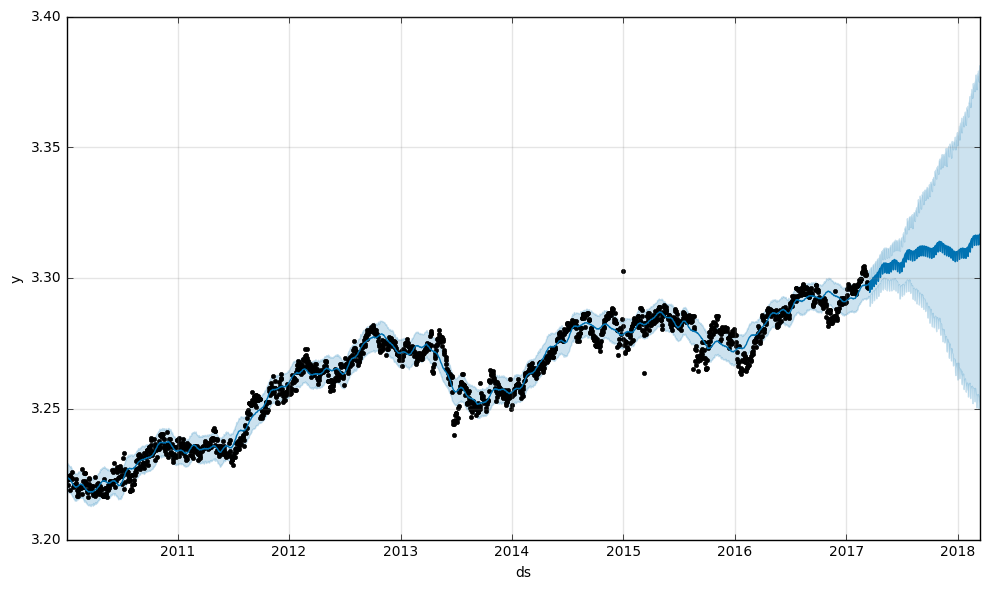

In [71]:
print(STOCK_SYMBOL)
model.plot(forecast);

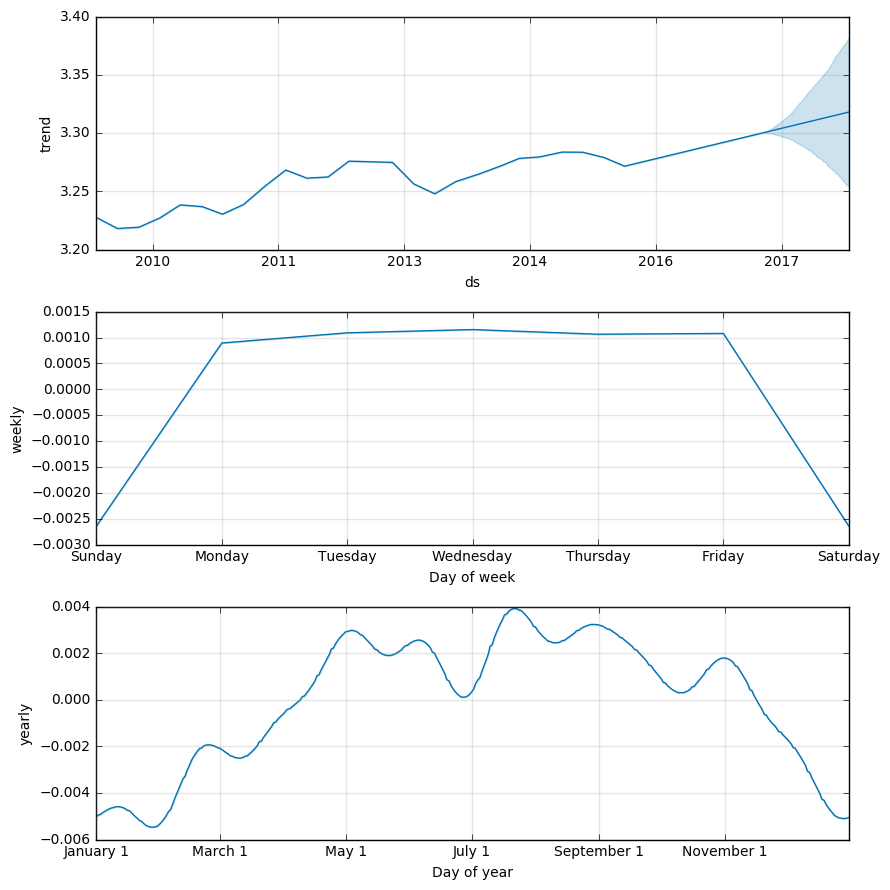

In [72]:
# Show forcast components
model.plot_components(forecast);